In [1]:
from config import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getLog(camp, c0):
  inputPath = logPath + str(camp) + "/qlearning/v1-c0-" + str(c0) + ".txt"
  
  lines = []
  with open(inputPath) as f:
    lines = f.readlines()
  
  rewards = []
  clicks = []

  for line in lines[1:]:
    line = line.split('  ')
    reward = float(line[1].strip())
    click = int(line[2].strip())
    rewards.append(reward)
    clicks.append(click)
    
  rewards = np.array(rewards, dtype=float)
  clicks = np.array(clicks, dtype=int)
  return rewards, clicks

In [3]:
def getCost(rewards, clicks, scaling=100):
  cost = (clicks - rewards) * 100/scaling
  return cost

In [4]:
camp = campaigns[0]

In [17]:
savePath = plotPath + camp + "/"

### Plotting training time for c0=1/32

In [10]:
rewards, clicks = getLog(camp, 32)
frac_cost = getCost(rewards, clicks)

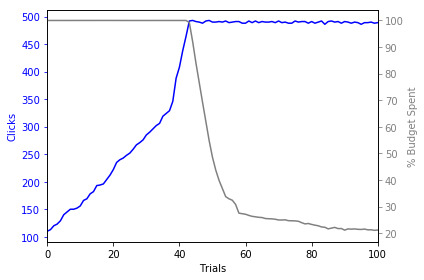

In [14]:
fig, ax1 = plt.subplots()

ax1.plot(clicks, 'blue')
ax1.set_xlabel('Trials')
ax1.set_xlim(0, 100)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Clicks', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(frac_cost, 'gray')
ax2.set_ylabel('% Budget Spent', color='gray')
ax2.tick_params('y', colors='gray')

fig.tight_layout()
plt.savefig(savePath + "Training", dpi=300)
plt.show()

### Plotting reward and cost across budgets

In [8]:
rewards = []
clicks = []
frac_costs = []
c0s = [32, 16, 8, 4]
for c0 in c0s:
  r, c = getLog(camp, c0)
  fc = getCost(r, c)
  rewards.append(r)
  clicks.append(c)
  frac_costs.append(fc)

In [13]:
def getBudgetString(c0):
  return "c0 = 1/" + str(c0)

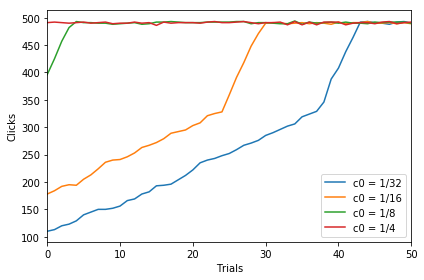

In [19]:
fig, ax = plt.subplots()

for i, c in enumerate(clicks):
  ax.plot(c, label=getBudgetString(c0s[i]))

ax.legend()
ax.set_xlabel('Trials')
ax.set_xlim(0, 50)
# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('Clicks')
ax.tick_params('y')

fig.tight_layout()
plt.savefig(savePath + "clicksbudget", dpi=300)
plt.show()

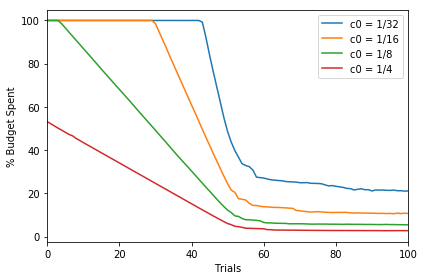

In [21]:
fig, ax = plt.subplots()

for i, fc in enumerate(frac_costs):
  ax.plot(fc, label=getBudgetString(c0s[i]))

ax.legend()
ax.set_xlabel('Trials')
ax.set_xlim(0, 100)
# Make the y-axis label, ticks and tick labels match the line color.
ax.set_ylabel('% Budget Spent')
ax.tick_params('y')

fig.tight_layout()
plt.savefig(savePath + "costbudget", dpi=300)
plt.show()